# 머신러닝 입문
### 강사님 코드 확인 : https://colab.research.google.com/drive/1wsiCAYddbqJ17dPHPOTnBr0m5gfCLYCI?usp=sharing


## LINEAR REGRESSION

### 기존의 프로그래밍 방식

In [25]:
# 섭씨를 화씨로 바꾸는 함수 작성
def celsius_to_fahereheit(x):
  return x * 1.8 + 32

# 곱해지는 값을 가중치, 더해지는 값을 편향값
# 1.8 = 가중치 / 32 = 편향값

In [60]:
celsius_value = int(input('섭씨온도를 입력하세요.'))
print('화씨온도로', celsius_to_fahereheit(celsius_value))

섭씨온도를 입력하세요.20
화씨온도로 68.0


### 머신러닝 방식

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data_C = np.array(range(0, 100))
data_F = celsius_to_fahereheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


In [28]:
# 인공지능 모델 생성
model = Sequential()
model.add(InputLayer(input_shape=(1,)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# 스케일링
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [30]:
# 학습 전 모델의 데이터 확인
model.predict([0.01])

array([[0.00430618]], dtype=float32)

In [31]:
# 학습 전 모델의 데이터 저장
model.save('before_learning.h5')

In [32]:
# 모델 학습
fit_hist = model.fit(scaled_data_C, scaled_data_F, epochs = 1000)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1429
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1184
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1025
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0883
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0746
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0605
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.0479
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0363
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0246
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0122
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0001
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9875
Epoch 13/1000
4/4 [==============================

In [33]:
# 학습 후 모델의 데이터 확인
print(model.predict([0.01]))

[[0.33832386]]


In [34]:
# 학습 후 모델의 데이터 저장
model.save('after_learning.h5')

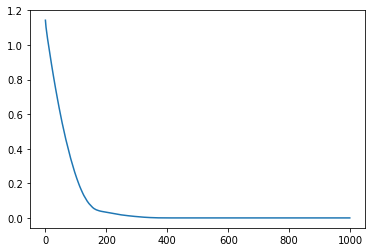

In [35]:
# 학습 과정 그래프로 확인
plt.plot(fit_hist.history['loss'])
plt.show()

### 잡음이 있는 실제 데이터로 학습

In [37]:
noise = np.array(np.random.normal(0, 0.05, 100))
print(noise)

[-4.07668714e-03  3.43245893e-02 -4.86024011e-03 -4.00667930e-02
  3.04451903e-02  5.09110280e-05 -2.73462323e-02 -8.10013265e-04
  5.65824939e-03  7.42377278e-02 -2.13775667e-02 -5.72596110e-02
 -4.06252633e-02  5.59271917e-02 -4.55606802e-02 -5.81384920e-02
  3.40208699e-02  1.56070971e-02 -1.99916926e-02 -1.55663438e-02
 -3.54512586e-02  5.04525435e-02  9.77302046e-04  1.16949190e-01
  6.90217289e-02 -9.22736755e-02  2.67143760e-02 -2.98496172e-03
 -8.18177897e-03 -5.41128263e-02  1.36455361e-02 -5.77568943e-03
  2.87440186e-02  2.32737920e-02  5.64924377e-02  2.22061236e-02
 -8.19974339e-03 -7.95180091e-03 -4.40514224e-02 -4.33158899e-03
 -1.10992732e-01 -1.34821719e-02  1.59892219e-02  3.30410634e-02
 -6.02800522e-02 -5.72367586e-02  6.16277181e-02 -7.12576069e-02
  5.03071341e-02 -7.46801947e-03  2.80156526e-02 -1.16179615e-02
  1.72327189e-02  3.43357635e-02 -8.63867174e-04 -8.45078104e-02
  5.65858216e-02  2.35543902e-03 -1.83088228e-02 -6.12442844e-02
 -1.02445103e-01  5.75712

In [41]:
noised_scaled_data_F = np.array([])

for data in scaled_data_F:
  noised_scaled_data_F = np.append(
      noised_scaled_data_F, np.random.normal(0, 0.05, 100) + data)

print(noised_scaled_data_F)
print(len(noised_scaled_data_F))

[0.31381398 0.33791225 0.37713902 ... 2.04337332 2.08603261 2.12311205]
10000


In [47]:
noised_scaled_data_C = []

for data in range(0, 100):
  for i in range(0, 100):
    noised_scaled_data_C.append(data)
noised_scaled_data_C = np.array(noised_scaled_data_C)
noised_scaled_data_C = noised_scaled_data_C / 100

print(noised_scaled_data_C)
print(len(noised_scaled_data_C))

[0.   0.   0.   ... 0.99 0.99 0.99]
10000


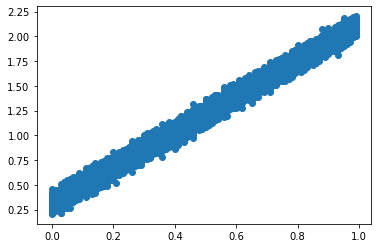

In [48]:
# 잡음 데이터 결과 확인1
plt.scatter(x = noised_scaled_data_C, y = noised_scaled_data_F)
plt.show()

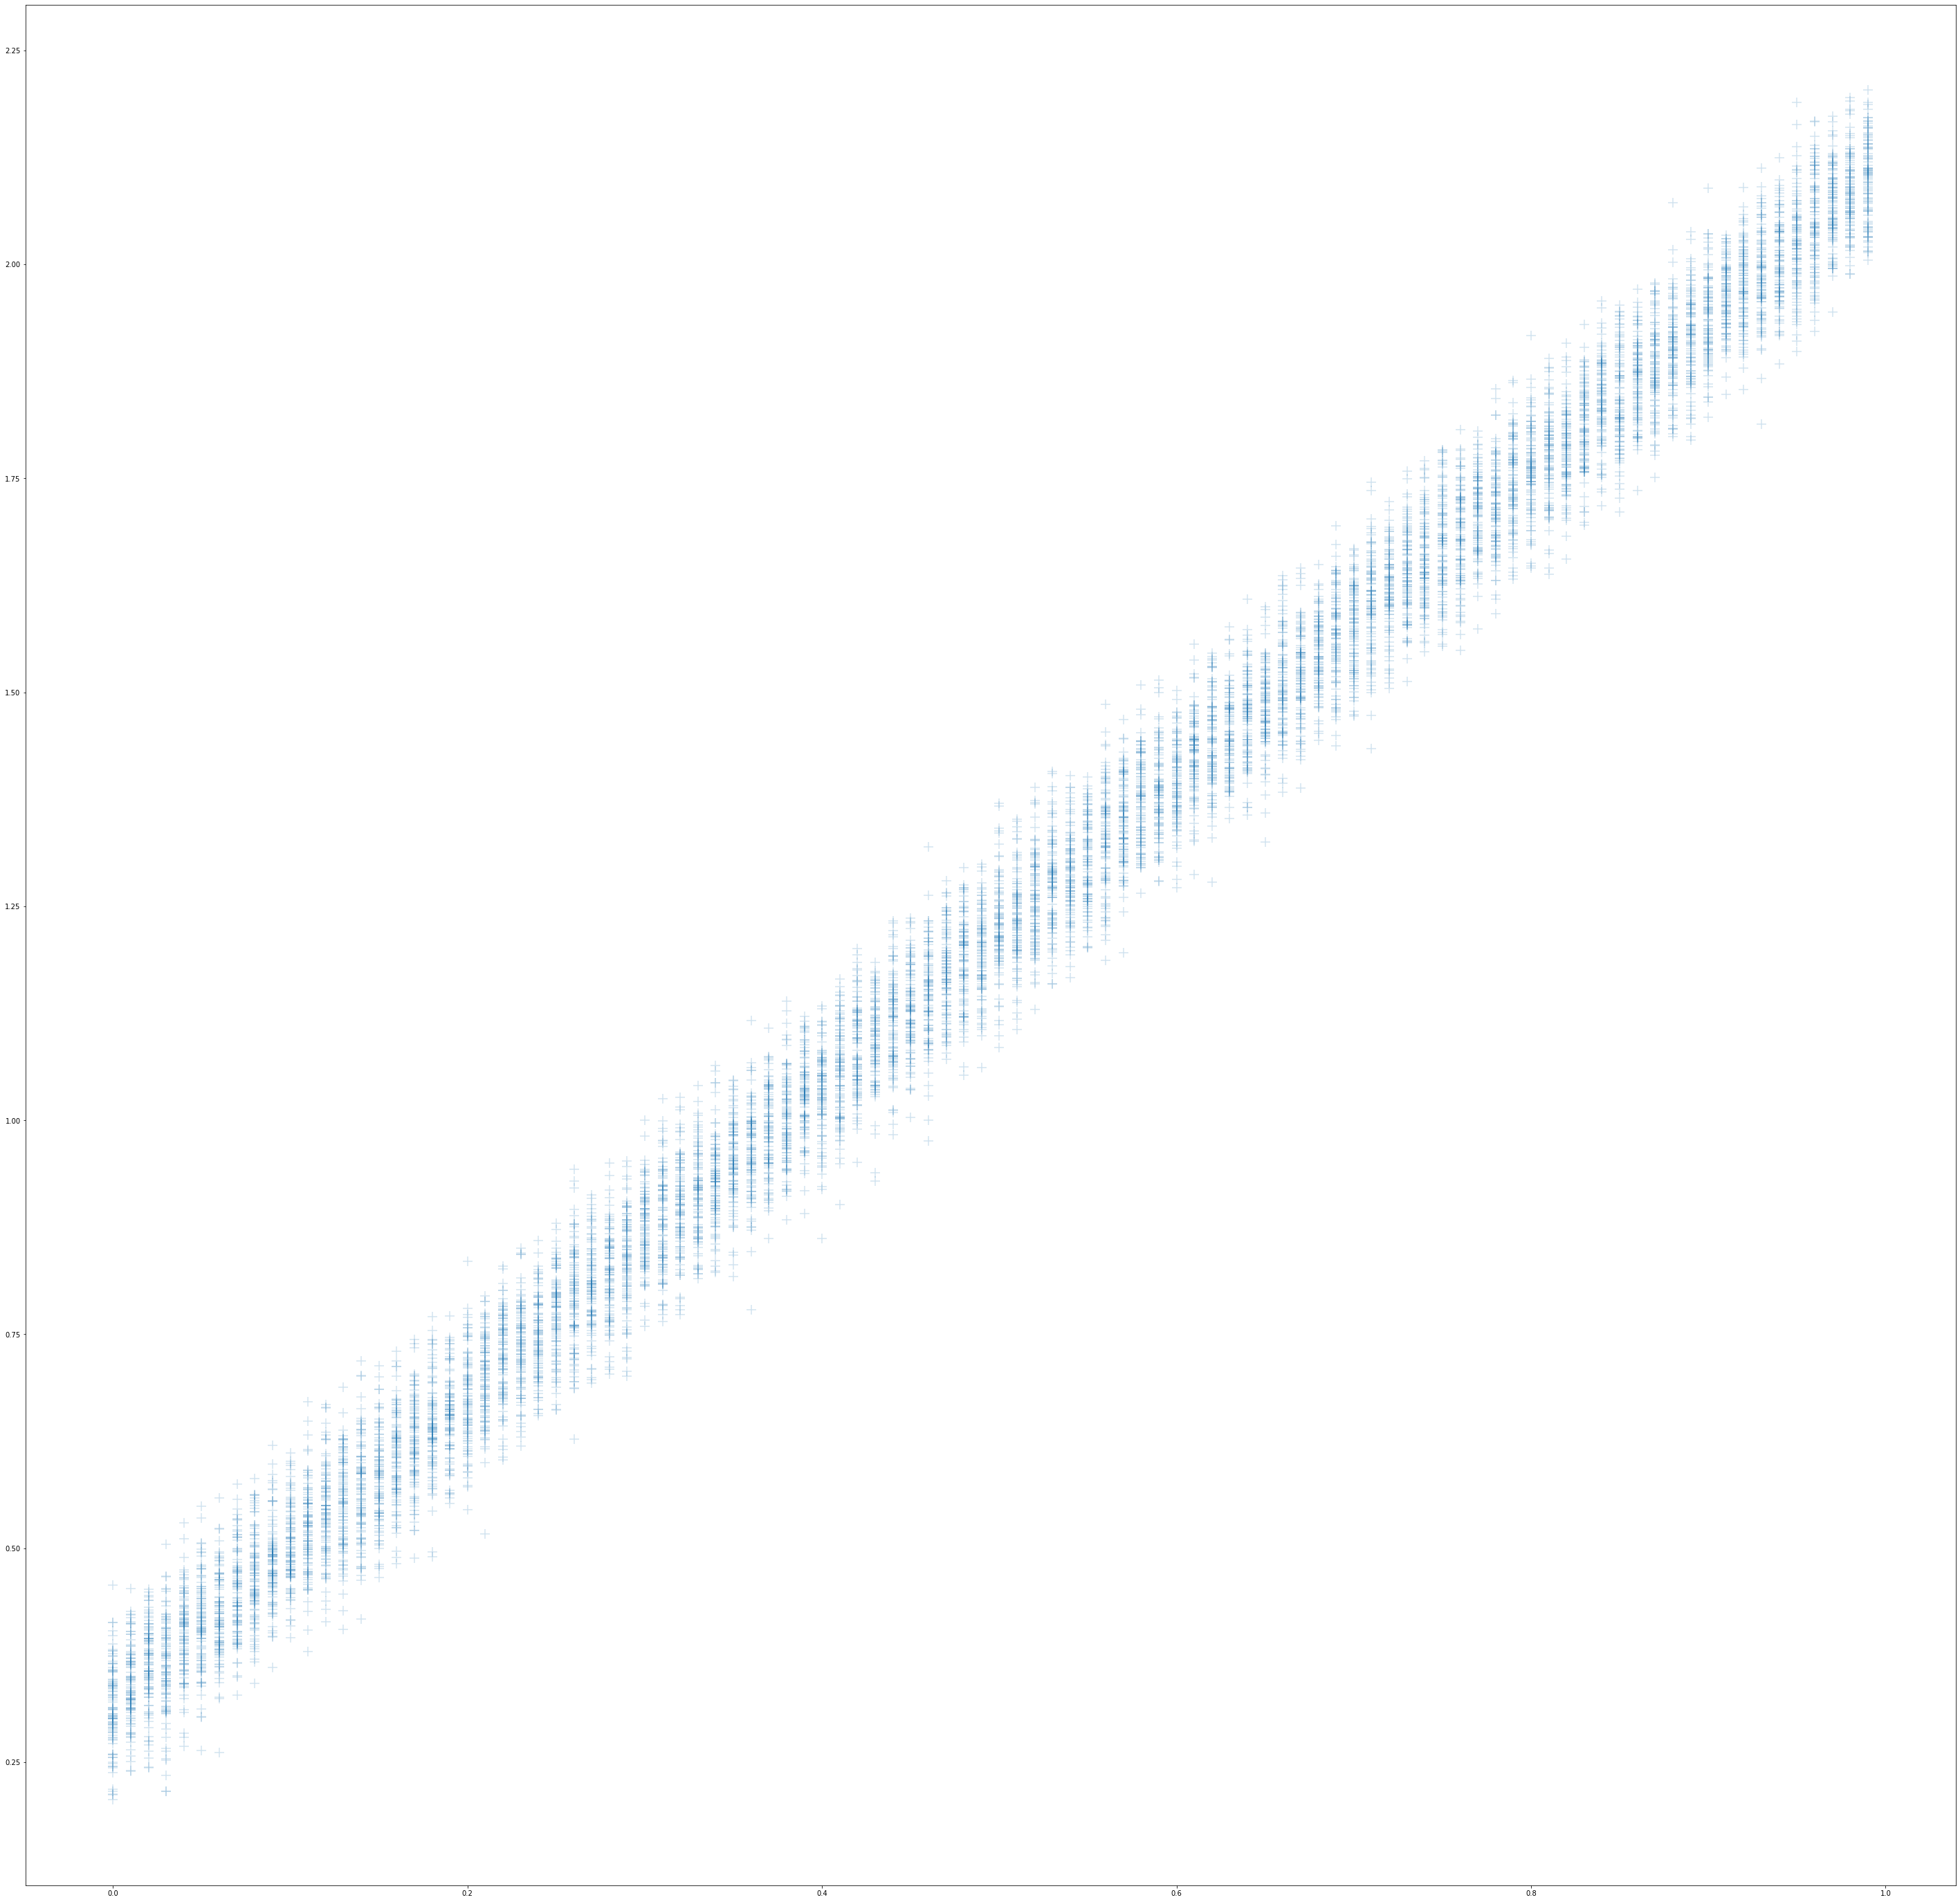

In [51]:
# 잡음 데이터 결과 확인 2
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
ax.scatter(x = noised_scaled_data_C,
           y = noised_scaled_data_F,
           alpha = 0.2, s = 200, marker = '+')
plt.show()

In [53]:
# 2번째 모델 생성
model2 = Sequential()
model2.add(InputLayer(input_shape=(1,)))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='rmsprop')
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
# 학습 전 모델의 데이터 확인
print(model2.predict([0.01]))

[[0.00842615]]


In [56]:
# 모델 학습
fit_hist = model2.fit(noised_scaled_data_C,
                      noised_scaled_data_F,
                      epochs = 20)

Epoch 1/20
313/313 [==============================] - 1s 955us/step - loss: 0.3771
Epoch 2/20
313/313 [==============================] - 0s 963us/step - loss: 0.0505
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 4/20
313/313 [==============================] - 0s 925us/step - loss: 0.0027
Epoch 5/20
313/313 [==============================] - 0s 927us/step - loss: 0.0025
Epoch 6/20
313/313 [==============================] - 0s 907us/step - loss: 0.0025
Epoch 7/20
313/313 [==============================] - 0s 934us/step - loss: 0.0025
Epoch 8/20
313/313 [==============================] - 0s 935us/step - loss: 0.0025
Epoch 9/20
313/313 [==============================] - 0s 918us/step - loss: 0.0025
Epoch 10/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/20
313/313 [==============================] - 0s 899us/step - loss: 0.0025
Epoch 12/20
313/313 [==============================] - 0s 953us/step - loss: 0.0025
Epoch

In [57]:
# 학습 된 모델의 데이터 저장
model2.save('noised_after_learning.h5')

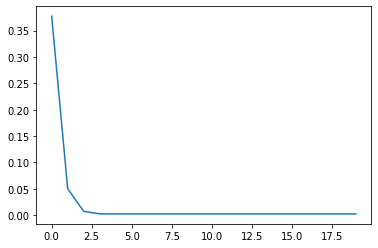

In [58]:
# 학습 경과 확인
plt.plot(fit_hist.history['loss'])
plt.show()

In [59]:
print(model2.predict([0.01]))

[[0.33882844]]
